In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from quant_met.bcs import find_fixpoint
from quant_met import hamiltonians
from quant_met import plotting
from quant_met.configuration import Configuration

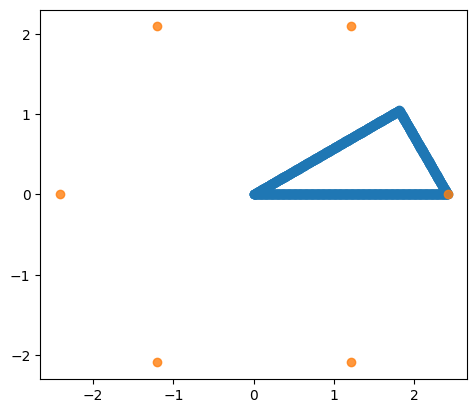

In [2]:
lattice_constant = np.sqrt(3)

all_K_points = 4 * np.pi / (3 * lattice_constant) * np.array([
    (np.sin(i * np.pi / 6), np.cos(i * np.pi / 6)) for i in [1, 3, 5, 7, 9, 11]]
)

Gamma = np.array([0, 0])
M = np.pi / lattice_constant * np.array([1, 1 / np.sqrt(3)])
K = 4 * np.pi / (3 * lattice_constant) * np.array([1, 0])

points = [(M, 'M'), (Gamma, r'\Gamma'), (all_K_points[1], 'K')]

band_path, band_path_plot, ticks, labels = plotting.generate_bz_path(points, number_of_points=1000)

BZ_path_plot = plotting.plot_into_bz(all_K_points, band_path)

graphene_h = hamiltonians.GrapheneHamiltonian(t_nn=1, a=lattice_constant, mu=0)

band_structure = graphene_h.calculate_bandstructure(band_path)

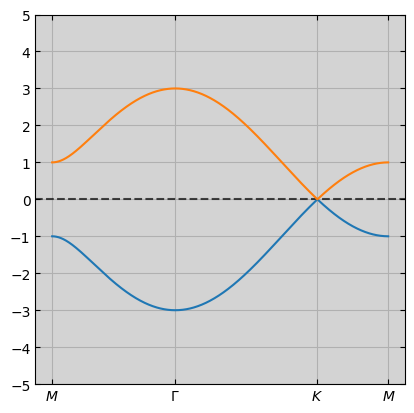

In [3]:
fig = plotting.plot_nonint_bandstructure(
    bands=band_structure[['band_0', 'band_1']].to_numpy().T,
    k_point_list=band_path_plot,
    labels=labels,
    ticks=ticks
)

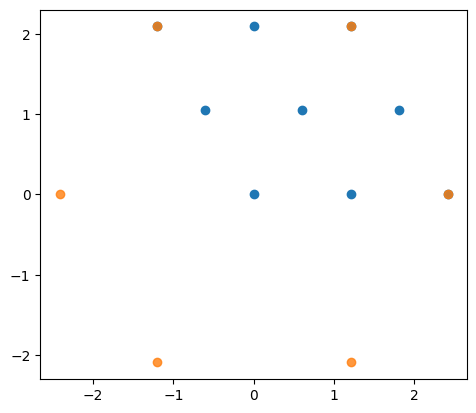

In [4]:
BZ_grid = find_fixpoint.generate_k_space_grid(3, 3, all_K_points[1], all_K_points[5])
BZ_grid_plot = plotting.plot_into_bz(all_K_points, BZ_grid)

In [5]:
import time

config = Configuration(t_gr=1, t_x=0, a=lattice_constant, U_Gr=3, U_X=3, mu=-1.0, beta=1000000)

start = time.time()
delta = find_fixpoint.solve_gap_equation(config, graphene_h, BZ_grid)
print(delta)
end = time.time()
print(f'Time taken to solve the gap equation: {end - start:0.2f} seconds')

#delta_interpolated = graphene.interpolate_gap(delta, whole_path)

#fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(2*5, 5))

#for delta, ax in zip(delta.data[['delta_1', 'delta_2']].to_numpy().T, axs):
    #for delta, ax in zip([delta, delta], axs):
    #ax.set_title(f"$V = {config.V}, \\mu = {config.mu}, U_G = {config.U_Gr}, U_X = {config.U_X}$")
    #plotting.scatter_into_bz(all_K_points, BZ_grid, delta, fig=fig, ax=ax)

             kx            ky  delta_0  delta_1
0  0.000000e+00  0.000000e+00      0.1      0.1
1  1.209200e+00  7.404212e-17      0.1      0.1
2  2.418399e+00  1.480842e-16      0.1      0.1
3 -6.045998e-01  1.047198e+00      0.1      0.1
4  6.045998e-01  1.047198e+00      0.1      0.1
5  1.813799e+00  1.047198e+00      0.1      0.1
6 -1.209200e+00  2.094395e+00      0.1      0.1
7 -1.110223e-15  2.094395e+00      0.1      0.1
8  1.209200e+00  2.094395e+00      0.1      0.1
           kx           ky  delta_0  delta_1
 0.000000e+00 0.000000e+00 0.102687 0.102687
 1.209200e+00 7.404212e-17 0.102687 0.102687
 2.418399e+00 1.480842e-16 0.102687 0.102687
-6.045998e-01 1.047198e+00 0.102687 0.102687
 6.045998e-01 1.047198e+00 0.102687 0.102687
 1.813799e+00 1.047198e+00 0.102687 0.102687
-1.209200e+00 2.094395e+00 0.102687 0.102687
-1.110223e-15 2.094395e+00 0.102687 0.102687
 1.209200e+00 2.094395e+00 0.102687 0.102687
Time taken to solve the gap equation: 0.01 seconds
